## Ensemble Methods

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [3]:
original = pd.read_csv("/kaggle/input/avengersss-ensemble/Threats (1).csv")
data = original.copy()
unique_ids = {}
data.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0


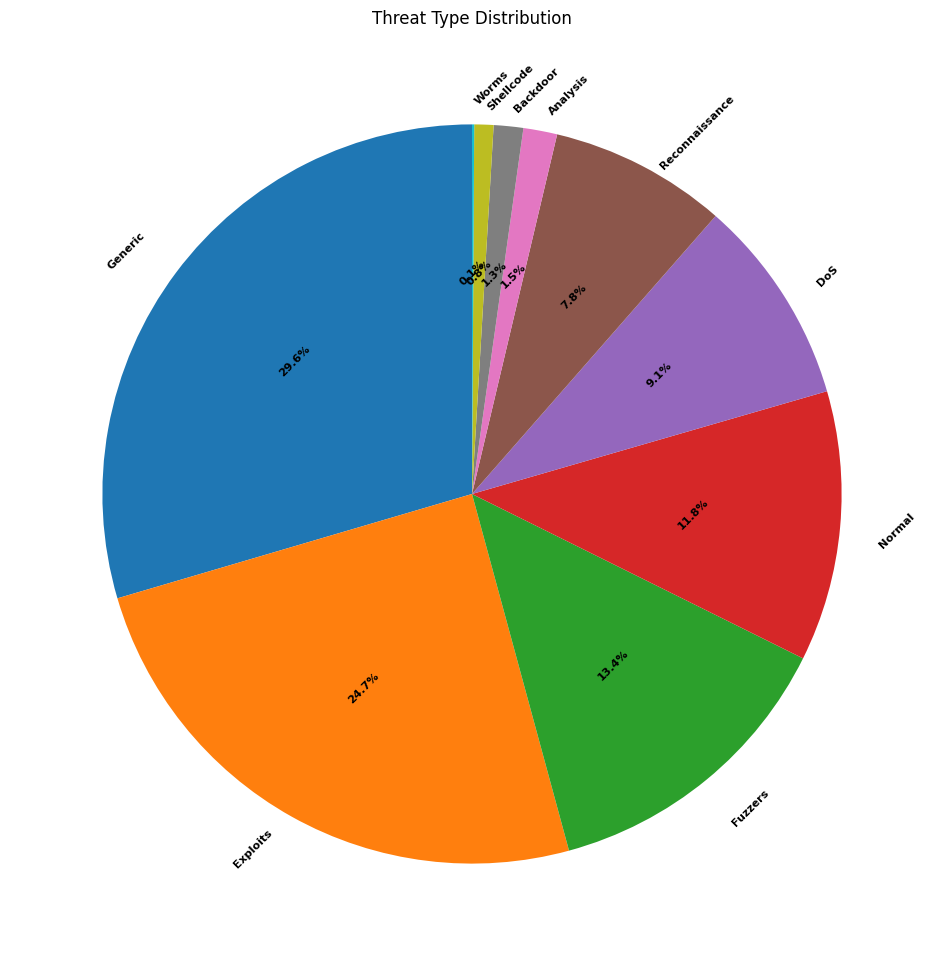

In [6]:
distributions = data['attack_cat'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(distributions, labels=distributions.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8, 'weight': 'bold', 'rotation': 45})

plt.title('Threat Type Distribution')

plt.show()

In [7]:
def unique_item_code (item):
    if item != "":
        sum_of_ords = sum([ord(val) for val in item])
        length = len(item)
        ord_first = ord(item[0])
        ord_last = ord(item[-1])
        unique_id = sum_of_ords+length+ord_first*2+ord_last
    else: unique_id = 1

    if unique_id not in unique_ids.keys():
        unique_ids[unique_id] = item

    return unique_id

def frequency_encoding(columns):
    global data
    for col in columns:
        data[col + '_freq'] = [unique_item_code(item) for item in data[col].values]
        data.drop(col, axis=1, inplace=True)
frequency_encoding(["proto", "service", "state", "attack_cat"])
titles = list(data)[1:-1]

titles = list(data)[1:-1]
accuracy_list = []
X= data[titles].values
y= data['attack_cat_freq'].values
data.head()

,Unnamed: 0,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_freq,service_freq,state_freq,attack_cat_freq
0,40000,40001,0.012996,16,18,1540,1644,2539.242797,31,29,...,0,0,5,7,0,0,674,181,442,887
1,40001,40002,0.004119,12,12,1064,2260,5583.879675,31,29,...,0,0,3,8,0,0,674,181,442,887
2,40002,40003,0.000988,2,2,146,178,3036.437382,31,29,...,0,0,7,2,0,0,678,643,439,887
3,40003,40004,3.415787,230,238,24344,29556,136.718127,31,29,...,0,0,4,1,0,0,674,671,442,887
4,40004,40005,0.193943,72,74,4238,63618,747.642372,31,29,...,0,0,6,12,0,0,674,181,442,887


In [8]:
classes =  list(map(lambda x: unique_ids[x],data['attack_cat_freq']))

def crossval(X, y, clf):
    kf = KFold(n_splits=10, shuffle=False)
    accuracy_list = []
    n= 0
    print("Cross validation for each fold:")
    for train_index, test_index in kf.split(X, y):
        clf.fit(X[train_index], y[train_index])
        score = clf.score(X[test_index], y[test_index])
        accuracy_list.append(score)
        print("\nModel iteration {0}:".format(n+1))
        train_predictions = clf.predict(X[train_index])
        train_accuracy = accuracy_score(y[train_index], train_predictions)
        total_predictions = clf.predict(X)
        total_accuracy = accuracy_score(y, total_predictions)
        print("Accuracies on:\nTraining Data: {0}\nTesting Data (Score): {1}\nTotal Data: {2}".format(train_accuracy, score, total_accuracy))
        n += 1
    print("*" * 20)
    print("Total Model:\nPrecision Score:", precision_score(y, clf.predict(X), average="weighted", zero_division=1), "\nRecall Score:", recall_score(y, clf.predict(X), average="weighted", zero_division=1), "\nF1 Score:", f1_score(y, clf.predict(X), average="weighted", zero_division=1), "\nMCC:", matthews_corrcoef(y, clf.predict(X)))
    classes =  list(map(lambda x: f"{x} : {unique_ids[x]}",set(data['attack_cat_freq'])))
    print(classes)
    print(classification_report(y, clf.predict(X)))

### Decision Tree Classifier

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.8099436809352577
Testing Data (Score): 0.8995197635759143
Total Data: 0.8189018848685912

Model iteration 2:
Accuracies on:
Training Data: 0.8256996724326188
Testing Data (Score): 0.7277966602630412
Total Data: 0.8159094435536903

Model iteration 3:
Accuracies on:
Training Data: 0.8257981889382383
Testing Data (Score): 0.725580020688636
Total Data: 0.8157764461619169

Model iteration 4:
Accuracies on:
Training Data: 0.8282118433259172
Testing Data (Score): 0.7020836411999409
Total Data: 0.8155991163062191

Model iteration 5:
Accuracies on:
Training Data: 0.8221448685215136
Testing Data (Score): 0.7470814245603665
Total Data: 0.8146385795878559

Model iteration 6:
Accuracies on:
Training Data: 0.8220053034718858
Testing Data (Score): 0.7526230234963794
Total Data: 0.8150671267391256

Model iteration 7:
Accuracies on:
Training Data: 0.8100930160007225
Testing Data (Score): 0.8554750997487809
Total Data: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         484       0.40      0.18      0.24     12264
         830       0.00      0.00      0.00       130
         887       1.00      1.00      1.00     16000
         949       1.00      0.98      0.99     40000
        1023       0.83      0.88      0.86     18184
        1059       0.45      0.12      0.19      1746
        1089       0.66      0.21      0.32      2000
        1117       0.64      0.86      0.74     33393
        1191       0.55      0.51      0.53      1133
        1731       0.85      0.71      0.77     10491

    accuracy                           0.82    135341
   macro avg       0.64      0.54      0.56    135341
weighted avg       0.81      0.82      0.80    135341



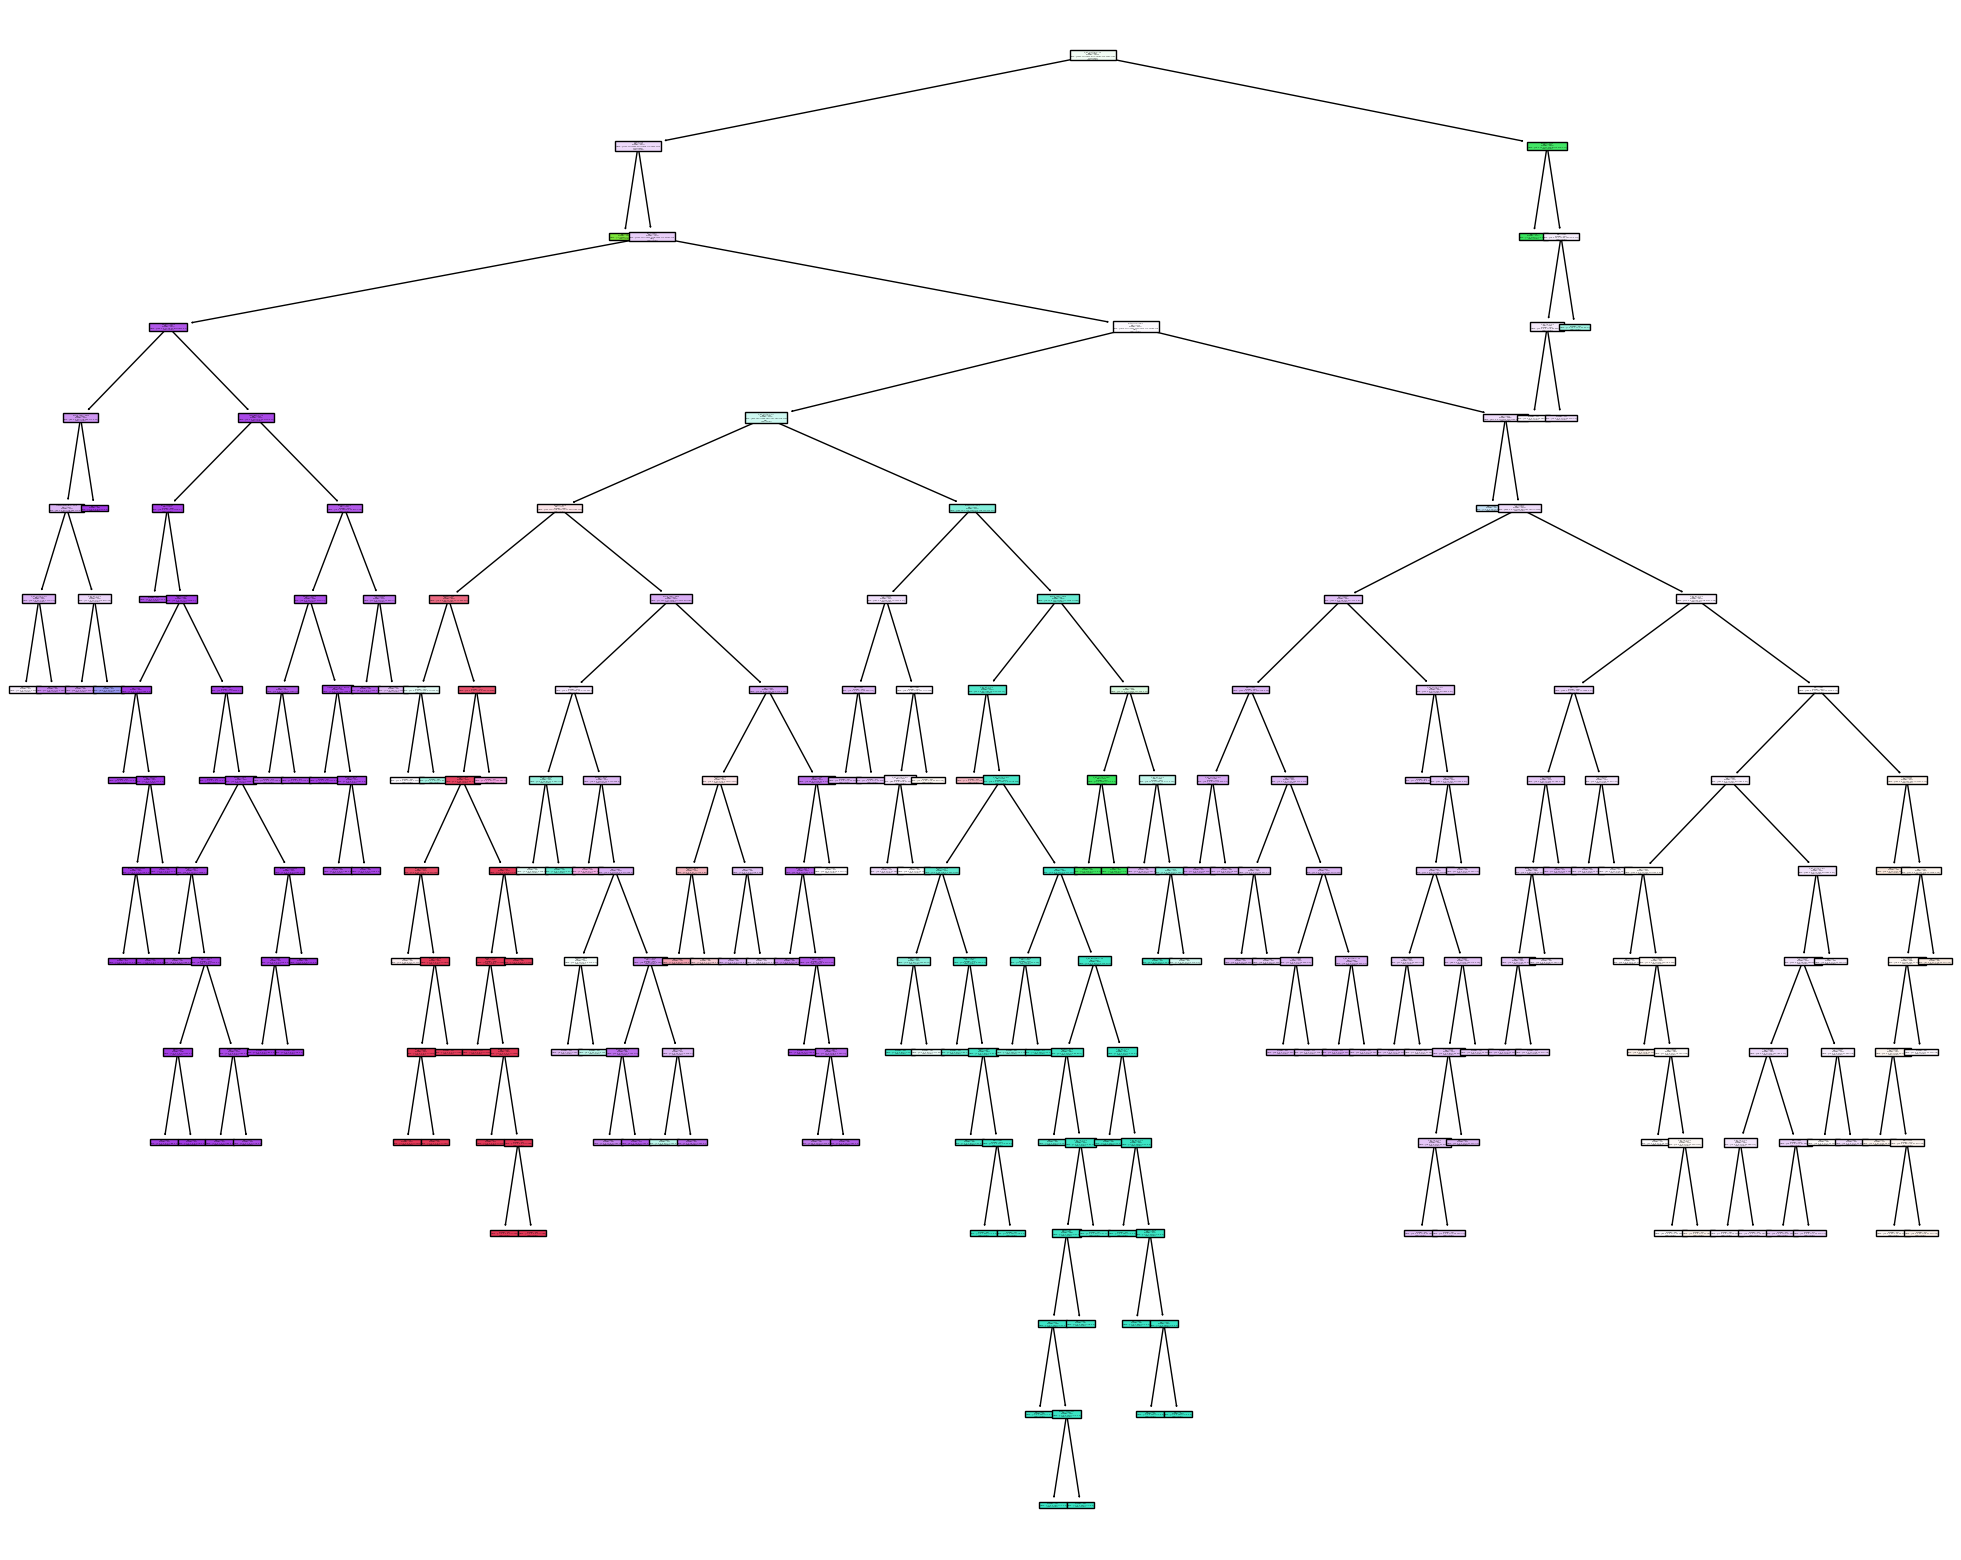

In [9]:
clf = DecisionTreeClassifier(min_samples_leaf=int(len(data)/300))

crossval(data[titles].values, data['attack_cat_freq'].values, clf)
clf.fit(X, y)
clfscore = clf.score(X, y)

y_pred = clf.predict(X)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=titles, class_names=classes, filled=True)

### Bagging Classifier

In [10]:
bag = BaggingClassifier(clf, 3)
bag.fit(X, y)
bagscore = bag.score(X, y)

crossval(data[titles].values, data['attack_cat_freq'].values, bag)

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.7999523832980313
Testing Data (Score): 0.891835980790543
Total Data: 0.8091413540612231

Model iteration 2:
Accuracies on:
Training Data: 0.8193453578201582
Testing Data (Score): 0.7183389980789123
Total Data: 0.8092447964770468

Model iteration 3:
Accuracies on:
Training Data: 0.8207574277340383
Testing Data (Score): 0.7170090143342692
Total Data: 0.810382663051108

Model iteration 4:
Accuracies on:
Training Data: 0.8177362548950389
Testing Data (Score): 0.6902615634697798
Total Data: 0.804988879940299

Model iteration 5:
Accuracies on:
Training Data: 0.8142471286543467
Testing Data (Score): 0.736072114674154
Total Data: 0.8064296850178438

Model iteration 6:
Accuracies on:
Training Data: 0.8134343674829854
Testing Data (Score): 0.7487069602482637
Total Data: 0.8069616745849373

Model iteration 7:
Accuracies on:
Training Data: 0.8012757887477732
Testing Data (Score): 0.8524456923304271
Total Data: 0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [11]:
rdfo = RandomForestClassifier(3)
rdfo.fit(X,y)
rdfoscore = rdfo.score(X, y)

crossval(data[titles].values, data['attack_cat_freq'].values, rdfo)

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.9548626504441489
Testing Data (Score): 0.8257850018470632
Total Data: 0.9419540272349103

Model iteration 2:
Accuracies on:
Training Data: 0.9579580812268589
Testing Data (Score): 0.7071080242352593
Total Data: 0.9328732608743839

Model iteration 3:
Accuracies on:
Training Data: 0.9599940890096629
Testing Data (Score): 0.7051869366041081
Total Data: 0.9345135620395889

Model iteration 4:
Accuracies on:
Training Data: 0.9583931957933453
Testing Data (Score): 0.6525786907048914
Total Data: 0.9278119712430084

Model iteration 5:
Accuracies on:
Training Data: 0.9573998210283481
Testing Data (Score): 0.7180434461356583
Total Data: 0.9334643603933768

Model iteration 6:
Accuracies on:
Training Data: 0.9571535297642992
Testing Data (Score): 0.7479680803901285
Total Data: 0.9362351393886553

Model iteration 7:
Accuracies on:
Training Data: 0.9553473938279409
Testing Data (Score): 0.8477168612383627
Total Data: 

### Boosting

In [12]:
boo = AdaBoostClassifier(clf)
boo.fit(X, y)
booscore = boo.score(X, y)
print("Boosted score : ", booscore)

Boosted score :  0.7684515409225586


### Comparing the scores

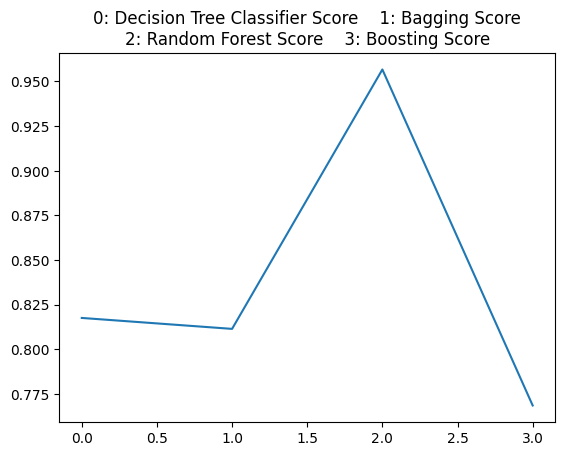

In [14]:
scores = [clfscore, bagscore, rdfoscore, booscore]
plt.plot([index for index, item in enumerate(scores)], scores)
plt.title("0: Decision Tree Classifier Score    1: Bagging Score\n2: Random Forest Score    3: Boosting Score")
plt.show()